In [1]:
#Class: IST 652  
#Section: M403  
#Assignment: Final Project: Predicting Song Popularity 
#Due Date: 6/13/2021

In [2]:
## import pandas library
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [4]:
# read in the 4 datasets used for this project
# the first two data sets can be downloaded from kaggle
# https://www.kaggle.com/edalrami/19000-spotify-songs/discussion/73524

song_data=pd.read_csv('song_data.csv')
song_info=pd.read_csv('song_info.csv')

# the second two datasets are provided seperately
# these two datasets come from web scraping wikipedia

master_artist=pd.read_csv('master_artist_T.csv')
master_song=pd.read_csv('master_song_T.csv', encoding = ('ISO-8859-1'))

# used ISO 8859-1 because without it, i received a UTF-8 error.
# The ISO 8859-1 is a single byte encoding that can represent the first 256 Unicode characters

In [5]:
# The song_data table is an original dataset from Kaggle, which consists of a
# collection of songs that were parsed via the Organize Your Music tool.

# Note: there were many duplicate song names, without a way of uniquely identifying
#them. For this reason, duplicate song names were removed.

# original dataset dimensions
song_data.shape

(18835, 15)

In [6]:
#Data Preprocessing:
# clean up the song_data df

# remove duplicate song names
song_data = song_data.drop_duplicates(subset = "song_name", keep = False)

# cleaned dataset dimensions
song_data.shape

(10174, 15)

In [7]:
# view the song_data df
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.108,-6.407,0,0.0498,105.256,4,0.370
3,By The Way,74,216933,0.02640,0.451,0.970,0.003550,0,0.102,-4.938,1,0.1070,122.444,4,0.198
5,Bring Me To Life,80,235893,0.00895,0.316,0.945,0.000002,4,0.396,-3.169,0,0.1240,189.931,4,0.320
17,Best of You,62,256600,0.00701,0.370,0.944,0.000003,1,0.135,-4.979,0,0.0767,130.315,4,0.345
20,The Kill (Bury Me),69,231533,0.00140,0.309,0.912,0.000271,4,0.582,-3.881,0,0.0646,183.035,3,0.302


In [8]:
# The song_info table is an original dataset from Kaggle which contains the
# corresponding artist, album, and playlist for each song in the song_data table.

# Note: as in the song_data table, there were duplication errors in this table
# as well. This is resolved in the same manner by removing duplicate song names.

# original dataset dimensions
song_info.shape

(18835, 4)

In [9]:
# clean up the song_info df

# remove duplicate song names
song_info = song_info.drop_duplicates(subset = "song_name", keep = False)

# cleaned dataset dimensions
song_info.shape

(10174, 4)

In [10]:
# view the song_info df
song_info.head()

,song_name,artist_name,album_names,playlist
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
5,Bring Me To Life,Evanescence,Fallen,00s Rock Anthems
17,Best of You,Foo Fighters,Best Of You,00s Rock Anthems
20,The Kill (Bury Me),Thirty Seconds To Mars,A Beautiful Lie,00s Rock Anthems


In [11]:
# The master_song_T table was collected by web scraping wikipedia pages
# for additional information about the songs.

# original dataset dimensions
master_song.shape

(14006, 9)

In [12]:
# clean up the master_song df

# see which songs from master_song exist in song_data
master_song = master_song.merge(song_data['song_name'], indicator = True, how = 'outer', on = 'song_name')

# keep only rows that exist in both dataframes
master_song = master_song[master_song._merge != 'left_only']

# cleaned dataset dimensions
master_song.shape

(10174, 10)

In [13]:
# view the master_song df
master_song.head()

,song_id,song_name,artist_name,song_single,song_released,song_genre,song_label,song_songwriter,song_producer,_merge
1,In The End Linkin Park,In The End,Linkin Park,1.0,2001.0,"alt,rock,metal,pop,rap",warner bros.,"brad delson,chester bennington,joe hahn,mike s...",don gilmore,both
4,By The Way Red Hot Chili Peppers,By The Way,Red Hot Chili Peppers,1.0,2002.0,"alt,rock",warner bros.,NaN,rick rubin,both
6,Bring Me To Life Evanescence,Bring Me To Life,Evanescence,1.0,2003.0,"alt,rock,metal,elect",wind-up,"lee,moody,hodges",dave fortman,both
25,Best of You Foo Fighters,Best of You,Foo Fighters,1.0,2005.0,"alt,rock","bmg,rough trade","dave grohl,taylor hawkins,nate mendel,chris sh...","nick raskulinecz,foo fighters",both
28,The Kill (Bury Me) Thirty Seconds To Mars,The Kill (Bury Me),Thirty Seconds To Mars,1.0,2006.0,rock,"immortal,virgin",jared leto,"josh abraham,thirty seconds to mars",both


In [14]:
# The master_artist_T table was constructed by web scraping wikipedia pages
# for additional artist information.

# original dataset dimensions
master_artist.shape

(7564, 4)

In [15]:
# view the master_artist df
master_artist.head()

,artist_name,birthday,country,startyear
0,Green Day,NaN,United States,1987.0
1,Linkin Park,NaN,United States,1996.0
2,The White Stripes,NaN,United States,1997.0
3,Red Hot Chili Peppers,NaN,United States,1983.0
4,Nickelback,NaN,Foreign,1995.0


In [16]:
# combine all the dataframes into one
song_main = master_song.merge(song_info, how = 'outer', on = 'song_name')  # merge master song and song info
song_main = song_main.merge(song_data, how = 'outer', on = 'song_name')  # merge song main with song data

# view the shape of the song main df
song_main.shape

(10174, 27)

In [17]:
# clean up the song_main df

# keep only selected columns
# these are the columns that will be dropped
song_main = song_main.drop(['song_id',
                            'artist_name_x',
                            'song_label',
                            'song_songwriter',
                            'song_producer',
                            '_merge'], axis = 1)

# remove all NAs
# we only want to keep data where the information was available from wikipedia
song_main = song_main.dropna()

# view the cleaned df dimensions
song_main.shape

(5263, 21)

In [18]:
# view the song_main df
song_main.head()

,song_name,song_single,song_released,song_genre,artist_name_y,album_names,playlist,song_popularity,song_duration_ms,acousticness,...,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,In The End,1.0,2001.0,"alt,rock,metal,pop,rap",Linkin Park,Hybrid Theory,00s Rock Anthems,66,216933,0.01030,...,0.853,0.000000,3,0.108,-6.407,0,0.0498,105.256,4,0.370
1,By The Way,1.0,2002.0,"alt,rock",Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems,74,216933,0.02640,...,0.970,0.003550,0,0.102,-4.938,1,0.1070,122.444,4,0.198
2,Bring Me To Life,1.0,2003.0,"alt,rock,metal,elect",Evanescence,Fallen,00s Rock Anthems,80,235893,0.00895,...,0.945,0.000002,4,0.396,-3.169,0,0.1240,189.931,4,0.320
3,Best of You,1.0,2005.0,"alt,rock",Foo Fighters,Best Of You,00s Rock Anthems,62,256600,0.00701,...,0.944,0.000003,1,0.135,-4.979,0,0.0767,130.315,4,0.345
4,The Kill (Bury Me),1.0,2006.0,rock,Thirty Seconds To Mars,A Beautiful Lie,00s Rock Anthems,69,231533,0.00140,...,0.912,0.000271,4,0.582,-3.881,0,0.0646,183.035,3,0.302


In [19]:
#Binning function 

#function created to bin the attributes
def binningFunction(col, cut_points, labels=None):
    minval=col.min()
    maxval=col.max()
    break_points= [minval]+cut_points+[maxval]
    print(break_points)
    if not labels:
        labels = range(len(cut_points)+1)
    colBin=pd.cut(col,bins=break_points, labels=labels, include_lowest=True)
    return colBin

In [20]:
# bin song_popularity for later use
cut_points=[40,80];
labels=['Not Popular', 'Medium Popualrity', 'High Popularity']
song_main['Popularity']=binningFunction(song_main['song_popularity'], cut_points, labels)
song_main

[0, 40, 80, 93]


,song_name,song_single,song_released,song_genre,artist_name_y,album_names,playlist,song_popularity,song_duration_ms,acousticness,...,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,Popularity
0,In The End,1.0,2001.0,"alt,rock,metal,pop,rap",Linkin Park,Hybrid Theory,00s Rock Anthems,66,216933,0.01030,...,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.3700,Medium Popualrity
1,By The Way,1.0,2002.0,"alt,rock",Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems,74,216933,0.02640,...,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.1980,Medium Popualrity
2,Bring Me To Life,1.0,2003.0,"alt,rock,metal,elect",Evanescence,Fallen,00s Rock Anthems,80,235893,0.00895,...,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.3200,Medium Popualrity
3,Best of You,1.0,2005.0,"alt,rock",Foo Fighters,Best Of You,00s Rock Anthems,62,256600,0.00701,...,0.000003,1,0.1350,-4.979,0,0.0767,130.315,4,0.3450,Medium Popualrity
4,The Kill (Bury Me),1.0,2006.0,rock,Thirty Seconds To Mars,A Beautiful Lie,00s Rock Anthems,69,231533,0.00140,...,0.000271,4,0.5820,-3.881,0,0.0646,183.035,3,0.3020,Medium Popualrity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9241,"Caledonia, My Love",0.0,2017.0,"alt,rock,blues,folk,country",Hiss Golden Messenger,Hallelujah Anyhow,Your Favorite Coffeehouse,64,180372,0.84200,...,0.000281,5,0.0953,-16.868,1,0.0474,117.462,3,0.1980,Medium Popualrity
9244,First Day Of My Life,1.0,2005.0,folk,Bright Eyes,"I'm Wide Awake, It's Morning",Your Favorite Coffeehouse,72,188800,0.91500,...,0.000083,4,0.0952,-17.024,1,0.0388,94.422,4,0.3830,Medium Popualrity
9246,...Familiar Place,0.0,2016.0,rock,Lucy Dacus,No Burden,Your Favorite Coffeehouse,62,175777,0.01280,...,0.058000,7,0.1130,-17.775,1,0.0370,46.591,4,0.0277,Medium Popualrity
9250,On That Day,0.0,2013.0,folk,Ásgeir,In the Silence,Your Favorite Coffeehouse,56,225850,0.91000,...,0.012000,7,0.1150,-15.252,1,0.0282,99.927,4,0.3020,Medium Popualrity


Text(0.5, 1.0, 'Frequency of Number of Songs by Year')

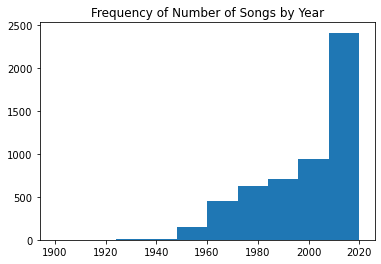

In [21]:
# performing some initial data exploration 
plt.hist(master_song.song_released, range = (1900, 2020))
plt.title('Frequency of Number of Songs by Year')

In [22]:
# Observations:
## there are more newer generation songs than older generation songs  
## there is a particularly larger number of songs between 2010 and 2020  
## the bias is probably due to the preferences of the creator of the data  

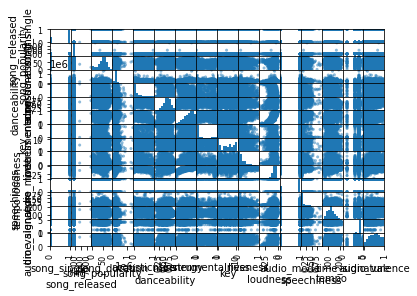

In [23]:
#testing out pandas' scatter plot matrix to see if at a quick glance there's a visual relationship between combinations of variables
#the matrix of scatter plots used to visualize bivariate relationships between combinations of variables. 
#Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.
#unfortunately too many variables compact together to quickly see a relationship
scatter_matrix(song_main)
rcParams['figure.figsize']=15,15

In [24]:
# unpacking the song genres

# create a function which searches for a substring
# this will be used to unpack the song genres

def check(string, sub_str):
    if (string.find(sub_str) == -1):
        return 0
    else:
        return 1

# here is the list of all of the parent genres
# note that hip and hop will get put together into hiphop

parent_genre_list = ['alt',
                     'rock',
                     'metal',
                     'punk',
                     'pop',
                     'hip',
                     'hop',
                     'r&b',
                     'rap',
                     'jazz',
                     'blues',
                     'folk',
                     'country',
                     'elect',
                     'other']

# create an empty variable for each of the genres
# these will be appended to throughout the for loop

altcount = []
rockcount = []
metalcount = []
punkcount = []
popcount = []
hiphopcount = []
rbcount = []
rapcount = []
jazzcount = []
bluescount = []
folkcount = []
countrycount = []
electcount = []
othercount = []

# iterate through each of the songs and corresponding genres
# if it contains the genre it will be given a 1 for true
# if does not contain the genre it wil be given a 0 for false

for nestedgenre in list(song_main['song_genre']):
    altcount.append(check(nestedgenre, 'alt'))
    rockcount.append(check(nestedgenre, 'rock'))
    metalcount.append(check(nestedgenre, 'metal'))
    punkcount.append(check(nestedgenre, 'punk'))
    popcount.append(check(nestedgenre, 'pop'))
    hiphopcount.append(max(check(nestedgenre, 'hip'), check(nestedgenre, 'hop')))
    rbcount.append(check(nestedgenre, 'r&b'))
    rapcount.append(check(nestedgenre, 'rap'))
    jazzcount.append(check(nestedgenre, 'jazz'))
    bluescount.append(check(nestedgenre, 'blues'))
    folkcount.append(check(nestedgenre, 'folk'))
    countrycount.append(check(nestedgenre, 'country'))
    electcount.append(check(nestedgenre, 'elect'))
    othercount.append(check(nestedgenre, 'other'))

# add the columns onto the song main dataframe
song_main['alt'] = altcount
song_main['rock'] = rockcount
song_main['metal'] = metalcount
song_main['punk'] = punkcount
song_main['pop'] = popcount
song_main['hiphop'] = hiphopcount
song_main['rb'] = rbcount
song_main['rap'] = rapcount
song_main['jazz'] = jazzcount
song_main['blues'] = bluescount
song_main['folk'] = folkcount
song_main['country'] = countrycount
song_main['elect'] = electcount
song_main['other'] = othercount

# view the resulting dataframe
song_main.head()

,song_name,song_single,song_released,song_genre,artist_name_y,album_names,playlist,song_popularity,song_duration_ms,acousticness,...,pop,hiphop,rb,rap,jazz,blues,folk,country,elect,other
0,In The End,1.0,2001.0,"alt,rock,metal,pop,rap",Linkin Park,Hybrid Theory,00s Rock Anthems,66,216933,0.01030,...,1,0,0,1,0,0,0,0,0,0
1,By The Way,1.0,2002.0,"alt,rock",Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems,74,216933,0.02640,...,0,0,0,0,0,0,0,0,0,0
2,Bring Me To Life,1.0,2003.0,"alt,rock,metal,elect",Evanescence,Fallen,00s Rock Anthems,80,235893,0.00895,...,0,0,0,0,0,0,0,0,1,0
3,Best of You,1.0,2005.0,"alt,rock",Foo Fighters,Best Of You,00s Rock Anthems,62,256600,0.00701,...,0,0,0,0,0,0,0,0,0,0
4,The Kill (Bury Me),1.0,2006.0,rock,Thirty Seconds To Mars,A Beautiful Lie,00s Rock Anthems,69,231533,0.00140,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# average song popularity for alternative genre
altpopularity = song_main[['song_popularity', 'alt']]
altpopularity = altpopularity[altpopularity.alt == 1]
altpopularity = round(sum(altpopularity['song_popularity']) / len(altpopularity['song_popularity']))
altpopularity

48

In [26]:
# average song popularity for rock genre
rockpopularity = song_main[['song_popularity', 'rock']]
rockpopularity = rockpopularity[rockpopularity.rock == 1]
rockpopularity = round(sum(rockpopularity['song_popularity']) / len(rockpopularity['song_popularity']))
rockpopularity

47

In [27]:
# average song popularity for metal genre
metalpopularity = song_main[['song_popularity', 'metal']]
metalpopularity = metalpopularity[metalpopularity.metal == 1]
metalpopularity = round(sum(metalpopularity['song_popularity']) / len(metalpopularity['song_popularity']))
metalpopularity

48

In [28]:
# average song popularity for punk genre
punkpopularity = song_main[['song_popularity', 'punk']]
punkpopularity = punkpopularity[punkpopularity.punk == 1]
punkpopularity = round(sum(punkpopularity['song_popularity']) / len(punkpopularity['song_popularity']))
punkpopularity

44

In [29]:
# average song popularity for pop genre
poppopularity = song_main[['song_popularity', 'pop']]
poppopularity.columns = ['song_popularity', 'popp']
poppopularity = poppopularity[poppopularity.popp == 1]
poppopularity = round(sum(poppopularity['song_popularity']) / len(poppopularity['song_popularity']))
poppopularity

50

In [30]:
# average song popularity for hiphop genre
hiphoppopularity = song_main[['song_popularity', 'hiphop']]
hiphoppopularity = hiphoppopularity[hiphoppopularity.hiphop == 1]
hiphoppopularity = round(sum(hiphoppopularity['song_popularity']) / len(hiphoppopularity['song_popularity']))
hiphoppopularity

49

In [31]:
# average song popularity for rb genre
rbpopularity = song_main[['song_popularity', 'rb']]
rbpopularity = rbpopularity[rbpopularity.rb == 1]
rbpopularity = round(sum(rbpopularity['song_popularity']) / len(rbpopularity['song_popularity']))
rbpopularity

50

In [32]:
# average song popularity for rap genre
rappopularity = song_main[['song_popularity', 'rap']]
rappopularity = rappopularity[rappopularity.rap == 1]
rappopularity = round(sum(rappopularity['song_popularity']) / len(rappopularity['song_popularity']))
rappopularity

53

In [33]:
# average song popularity for jazz genre
jazzpopularity = song_main[['song_popularity', 'jazz']]
jazzpopularity = jazzpopularity[jazzpopularity.jazz == 1]
jazzpopularity = round(sum(jazzpopularity['song_popularity']) / len(jazzpopularity['song_popularity']))
jazzpopularity

44

In [34]:
# average song popularity for blues genre
bluespopularity = song_main[['song_popularity', 'blues']]
bluespopularity = bluespopularity[bluespopularity.blues == 1]
bluespopularity = round(sum(bluespopularity['song_popularity']) / len(bluespopularity['song_popularity']))
bluespopularity

45

In [35]:
# average song popularity for folk genre
folkpopularity = song_main[['song_popularity', 'folk']]
folkpopularity = folkpopularity[folkpopularity.folk == 1]
folkpopularity = round(sum(folkpopularity['song_popularity']) / len(folkpopularity['song_popularity']))
folkpopularity

50

In [36]:
# average song popularity for country genre
countrypopularity = song_main[['song_popularity', 'country']]
countrypopularity = countrypopularity[countrypopularity.country == 1]
countrypopularity = round(sum(countrypopularity['song_popularity']) / len(countrypopularity['song_popularity']))
countrypopularity

45

In [37]:
# average song popularity for elect genre
electpopularity = song_main[['song_popularity', 'elect']]
electpopularity = electpopularity[electpopularity.elect == 1]
electpopularity = round(sum(electpopularity['song_popularity']) / len(electpopularity['song_popularity']))
electpopularity

48

In [38]:
# average song popularity for other genre
otherpopularity = song_main[['song_popularity', 'other']]
otherpopularity = otherpopularity[otherpopularity.other == 1]
otherpopularity = round(sum(otherpopularity['song_popularity']) / len(otherpopularity['song_popularity']))
otherpopularity

46

In [39]:
# Question1: What song genre has the most popular songs?
# create a dictionary that will be used to answer the question
                                                                                   
# create the dictionary with all of the results
popularitybygenre = {'Alternative': altpopularity,
                     'Rock': rockpopularity,
                     'Metal': metalpopularity,
                     'Punk': punkpopularity,
                     'Pop': poppopularity,
                     'HipHop': hiphoppopularity,
                     'R&B': rbpopularity,
                     'Rap': rappopularity,
                     'Jazz': jazzpopularity,
                     'Blues': bluespopularity,
                     'Folk': folkpopularity,
                     'Country': countrypopularity,
                     'Electronic': electpopularity,
                     'Other': otherpopularity}
                                                                                   
# show the resulting dictionary
popularitybygenre

{'Alternative': 48,
 'Rock': 47,
 'Metal': 48,
 'Punk': 44,
 'Pop': 50,
 'HipHop': 49,
 'R&B': 50,
 'Rap': 53,
 'Jazz': 44,
 'Blues': 45,
 'Folk': 50,
 'Country': 45,
 'Electronic': 48,
 'Other': 46}

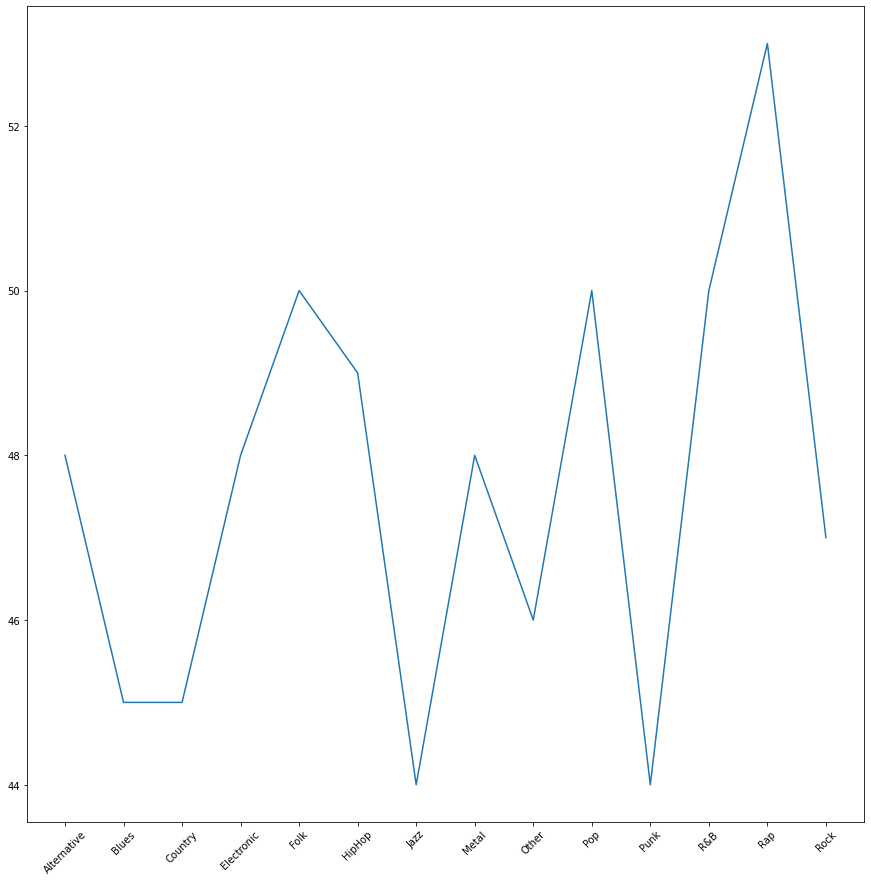

In [40]:
# show a plot of the average song popularity by genre
plt.plot(*zip(*sorted(popularitybygenre.items())))
plt.xticks(rotation=45)
plt.show()

In [41]:
#observation: 
#Rap is the genre with the most popular songs

(array([   0.,    0.,    0.,    0.,    0.,  172.,  655.,  731.,  941.,
        2219.]),
 array([1900. , 1912.2, 1924.4, 1936.6, 1948.8, 1961. , 1973.2, 1985.4,
        1997.6, 2009.8, 2022. ]),
 <BarContainer object of 10 artists>)

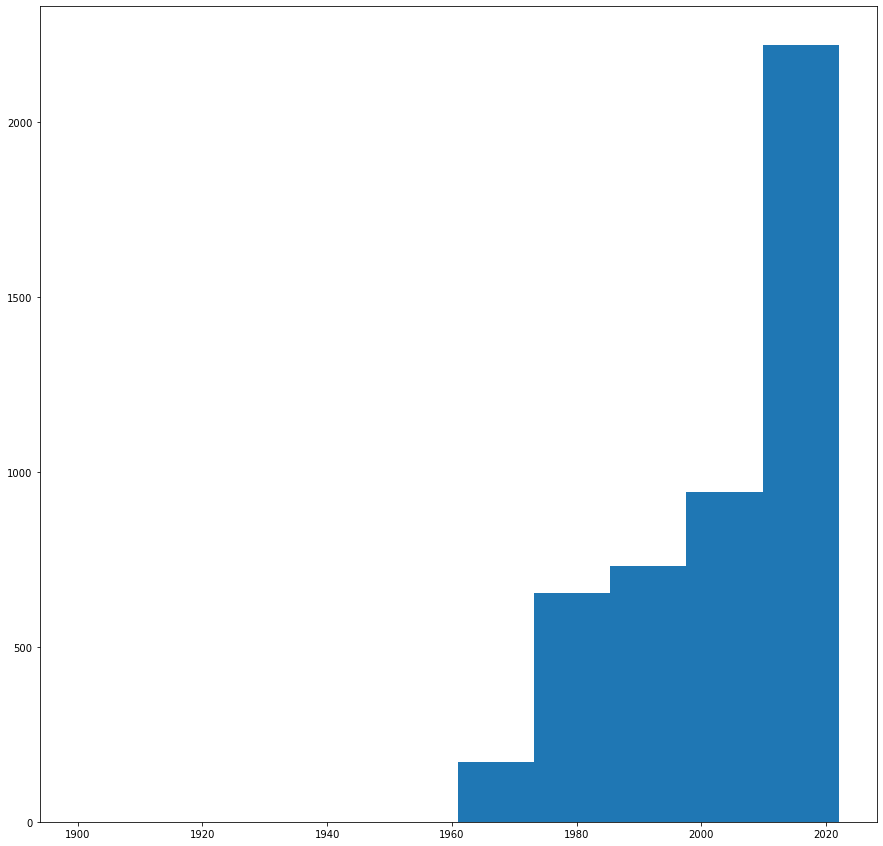

In [42]:
# Question 2: How have popular songs changed over time? Is there a particular period (time) where song popularity was higher?

# Remove outlier years from DF
song_main = song_main[song_main.song_released > 1969]
song_main = song_main[song_main.song_released < 2021]
plt.hist(song_main.song_released, range=(1900, 2022))

In [43]:
# Bin released year into decades
song_main.song_released = song_main.song_released.astype(int)
dec_cut_points=[1980,1990,2000,2010,2020];
dec_labels=['1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
song_main['Decade']=pd.cut(x=song_main['song_released'], bins=[1970, 1979, 1989, 1999, 2009, 2020], labels=['1970s', '1980s', '1990s', '2000s', '2010s'])
song_main

,song_name,song_single,song_released,song_genre,artist_name_y,album_names,playlist,song_popularity,song_duration_ms,acousticness,...,hiphop,rb,rap,jazz,blues,folk,country,elect,other,Decade
0,In The End,1.0,2001,"alt,rock,metal,pop,rap",Linkin Park,Hybrid Theory,00s Rock Anthems,66,216933,0.01030,...,0,0,1,0,0,0,0,0,0,2000s
1,By The Way,1.0,2002,"alt,rock",Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems,74,216933,0.02640,...,0,0,0,0,0,0,0,0,0,2000s
2,Bring Me To Life,1.0,2003,"alt,rock,metal,elect",Evanescence,Fallen,00s Rock Anthems,80,235893,0.00895,...,0,0,0,0,0,0,0,1,0,2000s
3,Best of You,1.0,2005,"alt,rock",Foo Fighters,Best Of You,00s Rock Anthems,62,256600,0.00701,...,0,0,0,0,0,0,0,0,0,2000s
4,The Kill (Bury Me),1.0,2006,rock,Thirty Seconds To Mars,A Beautiful Lie,00s Rock Anthems,69,231533,0.00140,...,0,0,0,0,0,0,0,0,0,2000s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9241,"Caledonia, My Love",0.0,2017,"alt,rock,blues,folk,country",Hiss Golden Messenger,Hallelujah Anyhow,Your Favorite Coffeehouse,64,180372,0.84200,...,0,0,0,0,1,1,1,0,0,2010s
9244,First Day Of My Life,1.0,2005,folk,Bright Eyes,"I'm Wide Awake, It's Morning",Your Favorite Coffeehouse,72,188800,0.91500,...,0,0,0,0,0,1,0,0,0,2000s
9246,...Familiar Place,0.0,2016,rock,Lucy Dacus,No Burden,Your Favorite Coffeehouse,62,175777,0.01280,...,0,0,0,0,0,0,0,0,0,2010s
9250,On That Day,0.0,2013,folk,Ásgeir,In the Silence,Your Favorite Coffeehouse,56,225850,0.91000,...,0,0,0,0,0,1,0,0,0,2010s


NameError: name 'decpopDF' is not defined

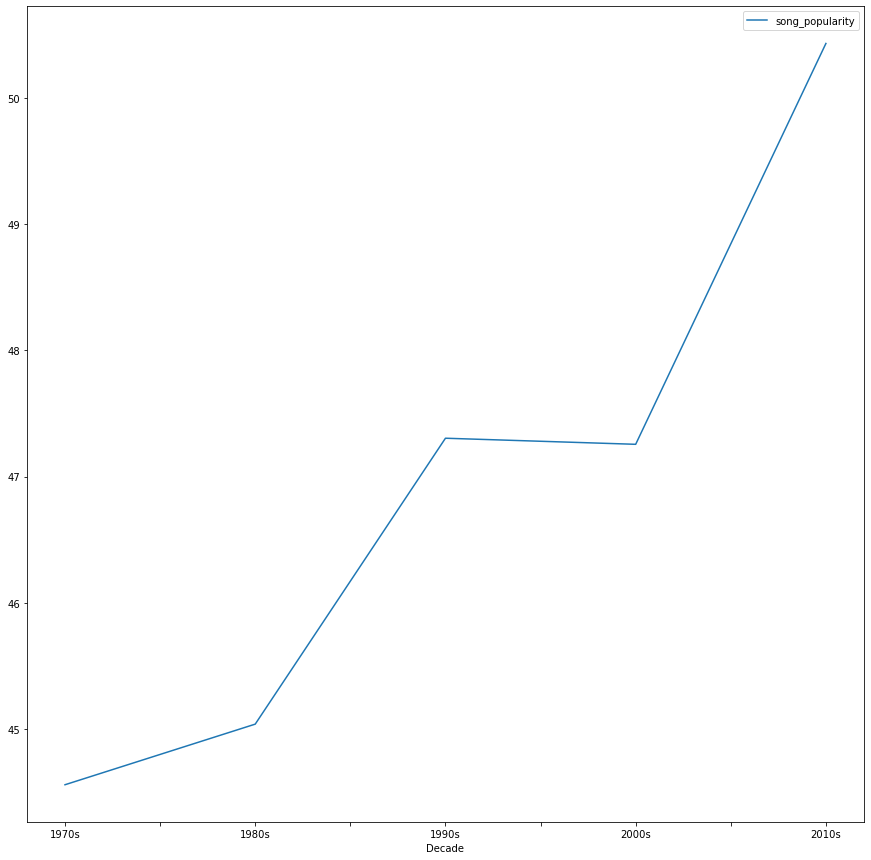

In [44]:
# Line graph of popularity by decade
decadeDF = song_main.groupby(['Decade']).mean()
decpopLine = decadeDF.reset_index().plot.line(x='Decade',y='song_popularity')
decpopDF['song_popularity']

In [45]:
# Observations on how song popularity has changed over the decades:
## The average song popularity was steadily increasing between the 1970s-1990s before plateauing between the 1990s and 2000s. Since then it has been on the rise, increasing to 50.54% in the 2010s.

In [46]:
# Question 3: How have song attributes changed over years?

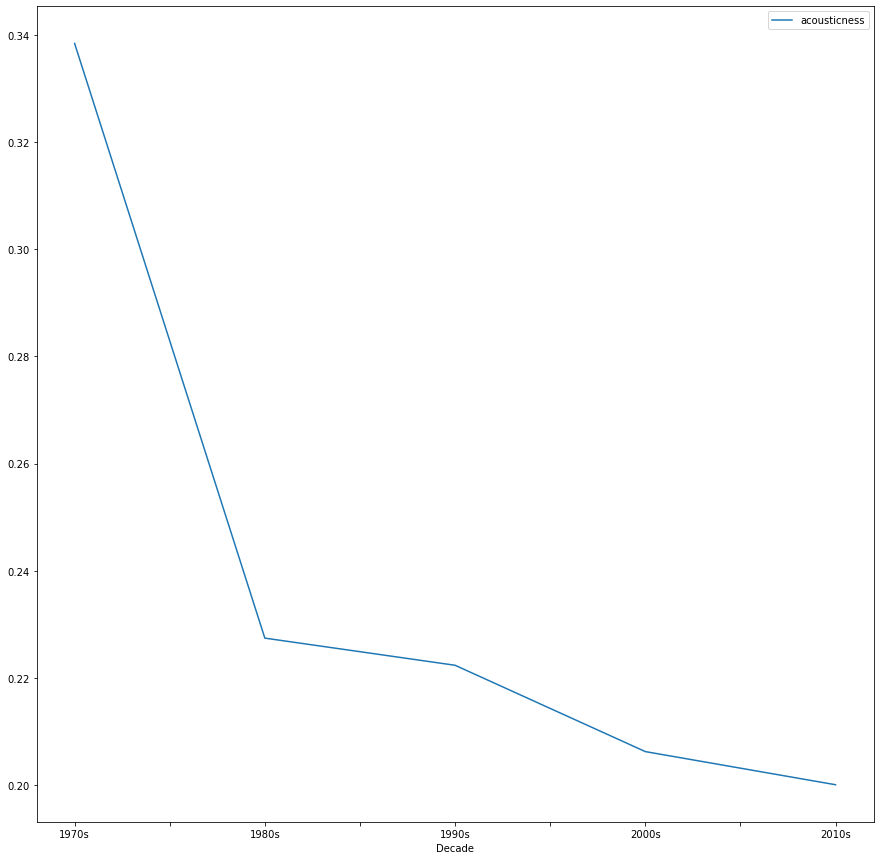

In [47]:
# Acoutsticness:
acousticLine = decadeDF.reset_index().plot.line(x='Decade',y='acousticness')

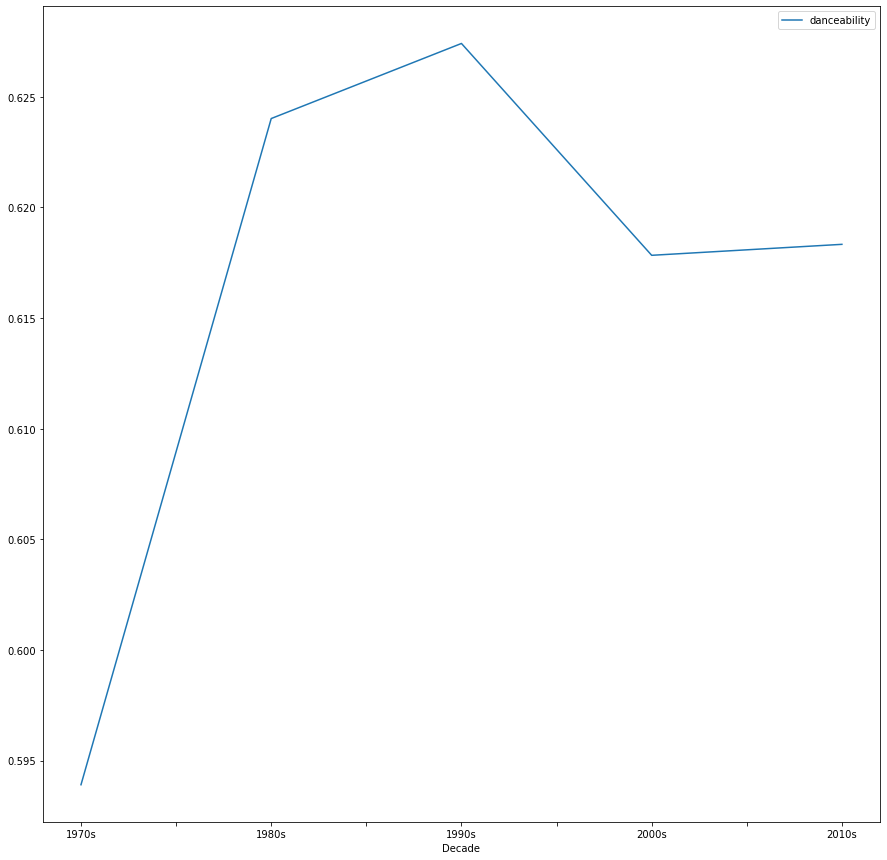

In [48]:
# Danceability:
danceLine = decadeDF.reset_index().plot.line(x='Decade',y='danceability')

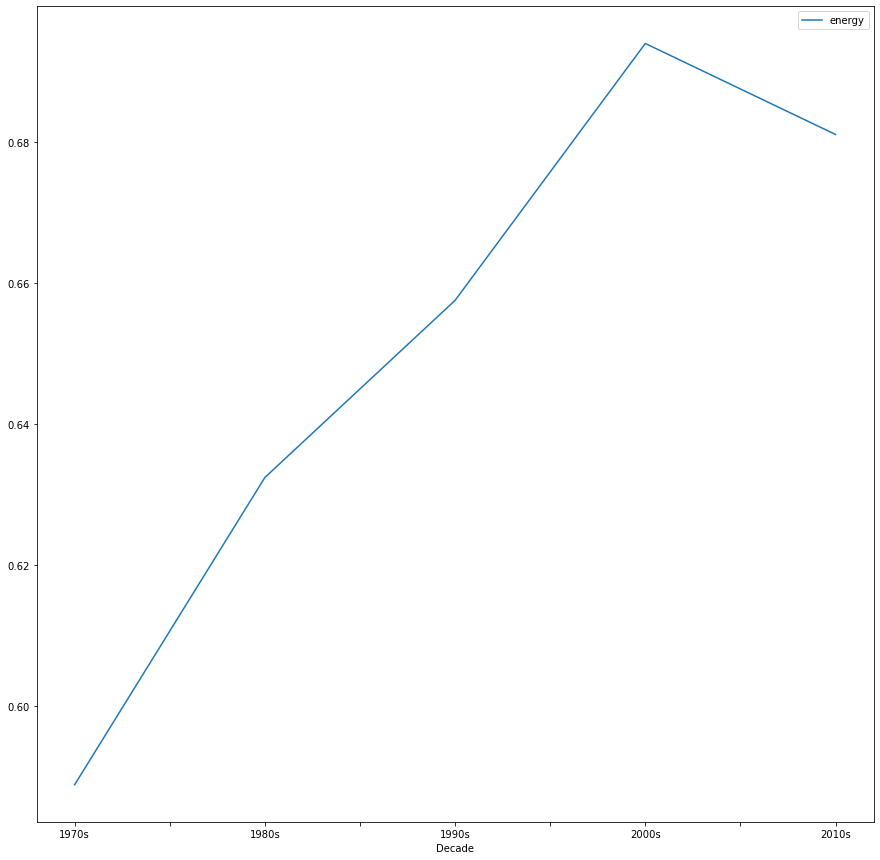

In [49]:
# Energy:
energyLine = decadeDF.reset_index().plot.line(x='Decade',y='energy')

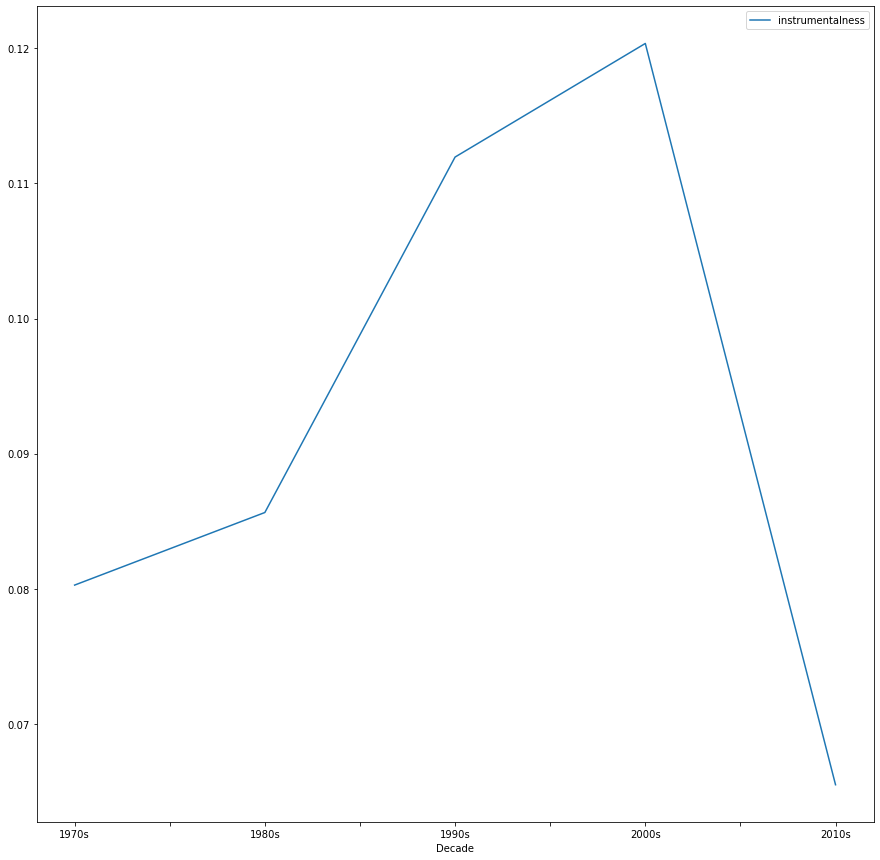

In [50]:
# Instrumentalness:
instrumentLine = decadeDF.reset_index().plot.line(x='Decade',y='instrumentalness')

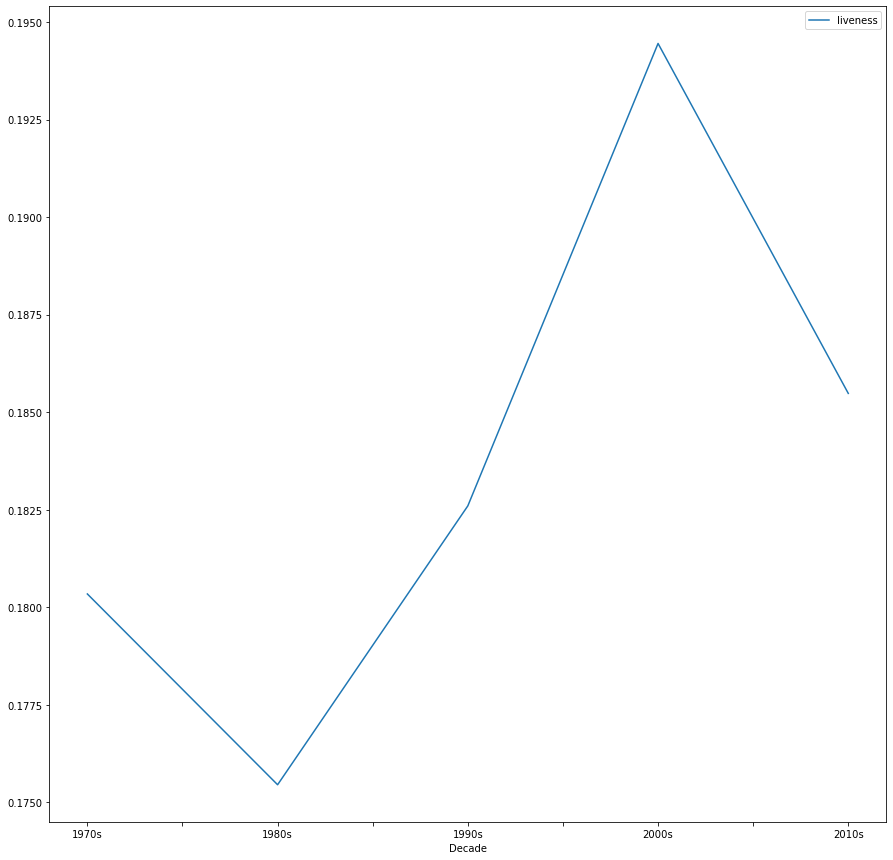

In [51]:
# Liveness:
livenessLine = decadeDF.reset_index().plot.line(x='Decade',y='liveness')

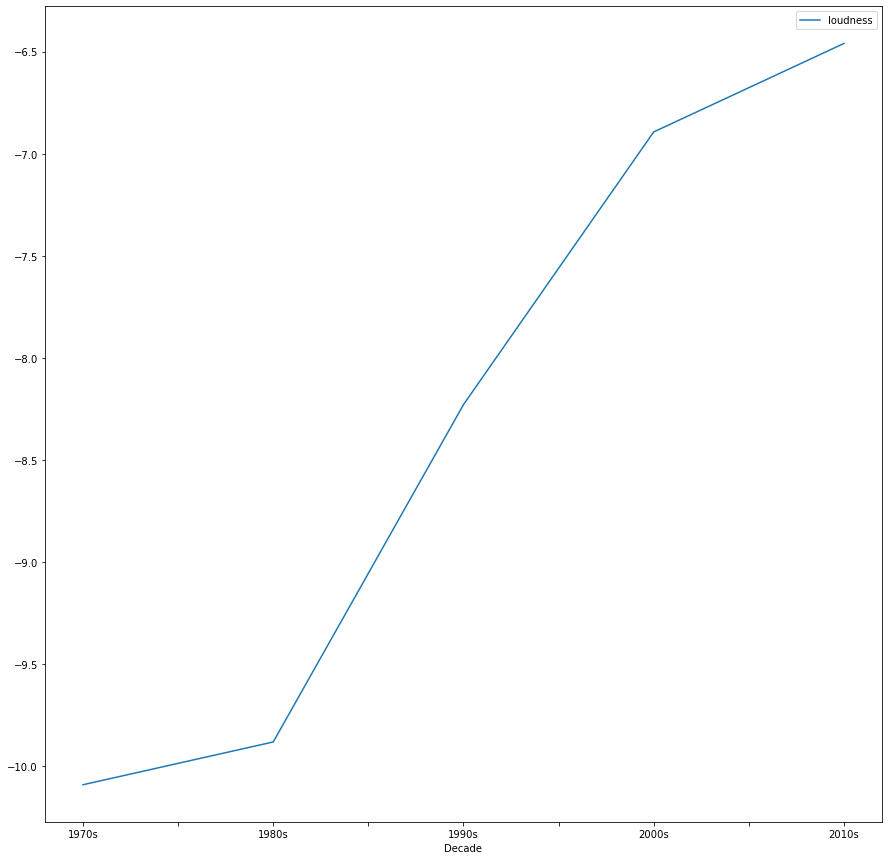

In [52]:
# Loudness:
loudnessLine = decadeDF.reset_index().plot.line(x='Decade',y='loudness')

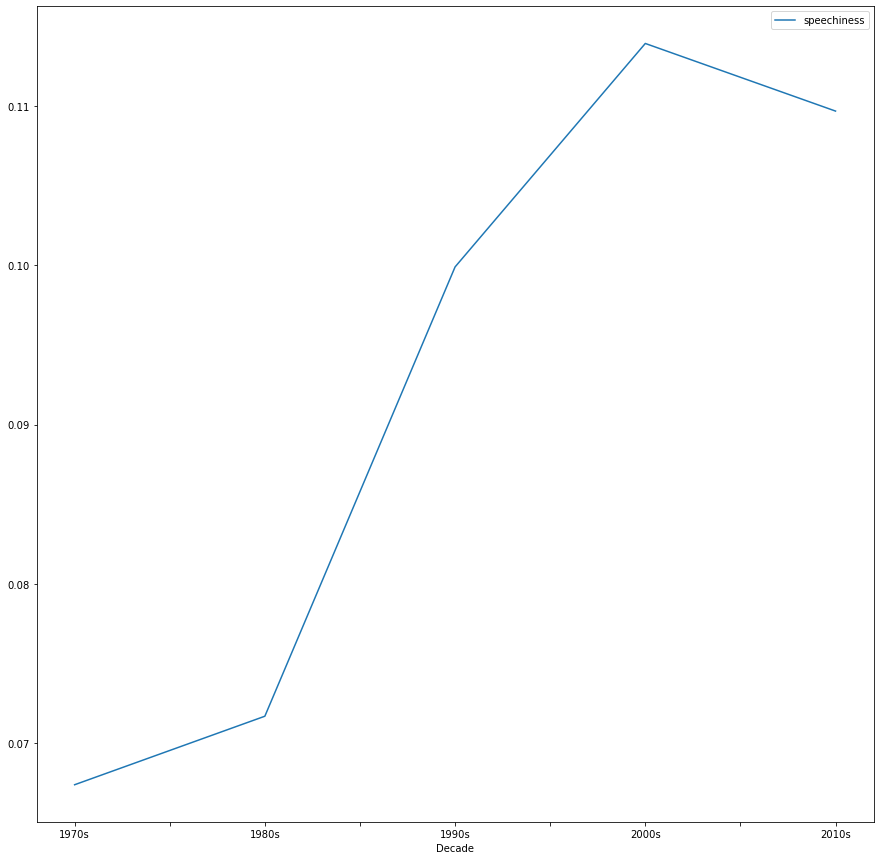

In [53]:
# Speechiness:
speechinessLine = decadeDF.reset_index().plot.line(x='Decade',y='speechiness')

In [54]:
# Subset dataframe to normalize the attributes, allowing for a comprehensive visual
attributeDF = decadeDF[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness']]
attributeDF

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
Decade,,,,,,,
1970s,0.338429,0.593908,0.588810,0.080277,0.180341,-10.090941,0.067385
1980s,0.227421,0.624021,0.632386,0.085648,0.175450,-9.881403,0.071688
1990s,0.222353,0.627414,0.657513,0.111945,0.182599,-8.229202,0.099905
2000s,0.206239,0.617839,0.693952,0.120349,0.194453,-6.893257,0.113938
2010s,0.200051,0.618335,0.681041,0.065506,0.185482,-6.459787,0.109691


In [55]:
# Function to scale the dataframe
def scale_df(data, columns, scaler):
  for col in columns:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))
  return data

In [56]:
# Scale and view the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
attributeDF = scale_df(attributeDF, attributeDF[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness']], scaler)
attributeDF.columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness']
attributeDF

<ipython-input-55-ac3ad26ce592>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))
<ipython-input-55-ac3ad26ce592>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))
<ipython-input-55-ac3ad26ce592>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness
Decade,,,,,,,
1970s,1.960446,-1.904968,-1.654748,-0.611542,-0.526447,-1.195857,-1.298426
1980s,-0.226066,0.656467,-0.490412,-0.348104,-1.300975,-1.055085,-1.076170
1990s,-0.325899,0.945113,0.180949,0.941722,-0.168888,0.054899,0.381391
2000s,-0.643297,0.130607,1.154588,1.353923,1.708496,0.952415,1.106277
2010s,-0.765183,0.172781,0.809623,-1.335999,0.287814,1.243629,0.886928


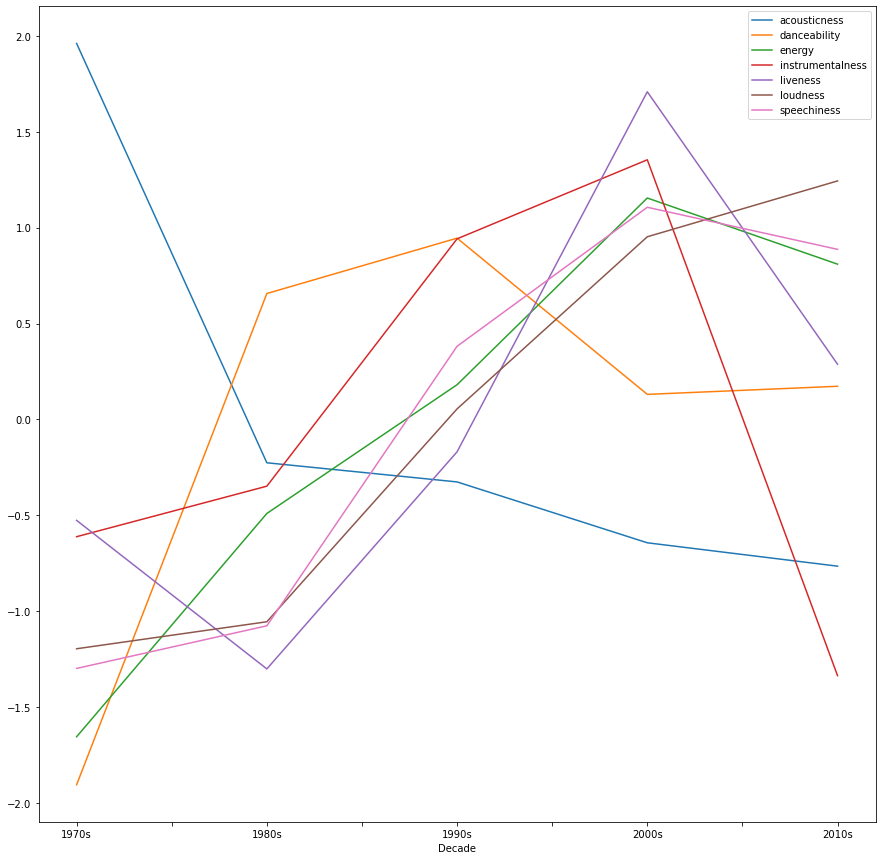

In [57]:
compLine = attributeDF.plot.line()

In [58]:
# Observation on how song attributes have changed over time:
## Accousticness is the one attribute that has been on the decline throughout the decades. This is likely the result of electronic instruments becomming more prominent.
## Instrumentalness, Liveness, and Speechiness all increased over time before declining in the 2010s.
## Energy and Loudness have been heavily increasing over the years.

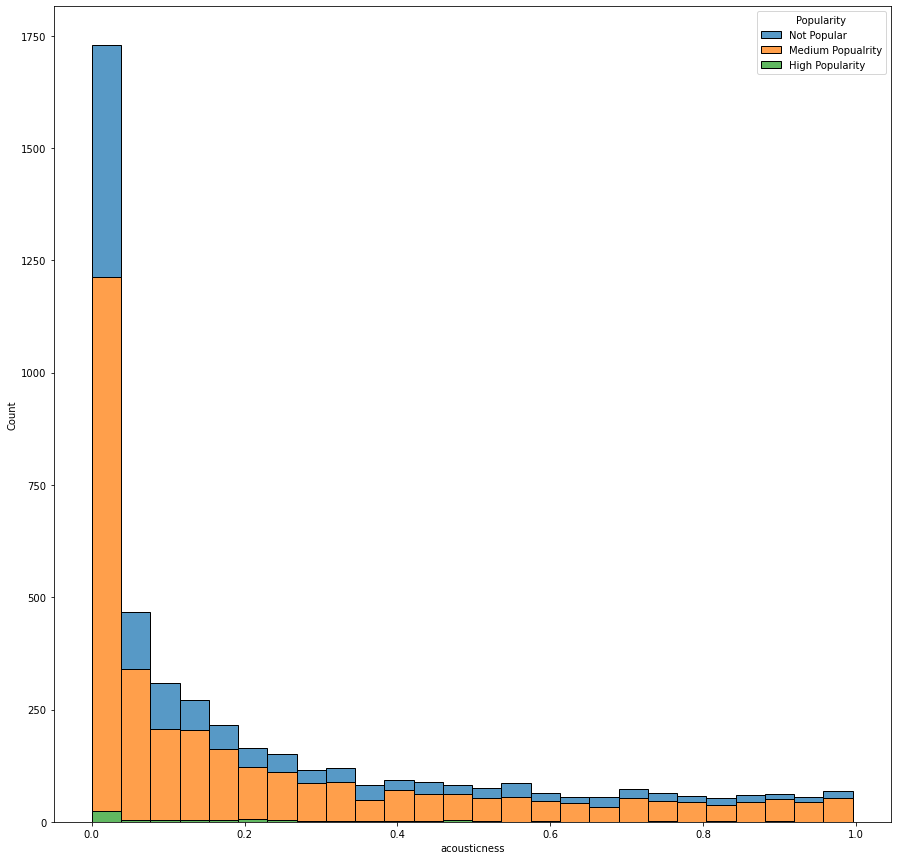

In [59]:
#Question 4: Are there certain song attribute that correlated with popular songs?
#The next few graphs takes a look at each of the attributes and it's distribution to song popularity

#taking a look at acousticness vs. popularity
sns.histplot(x='acousticness', data=song_main, hue= 'Popularity', multiple ='stack');

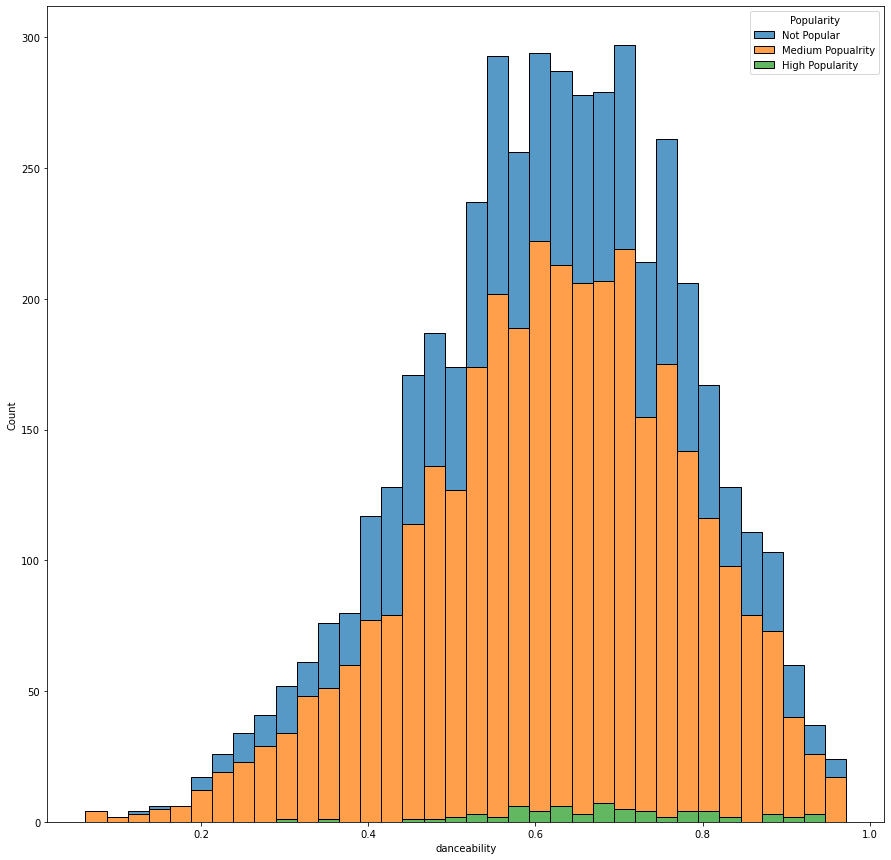

In [60]:
#taking a look at song danceability vs. popularity
sns.histplot(x='danceability', data=song_main, hue= 'Popularity', multiple ='stack');

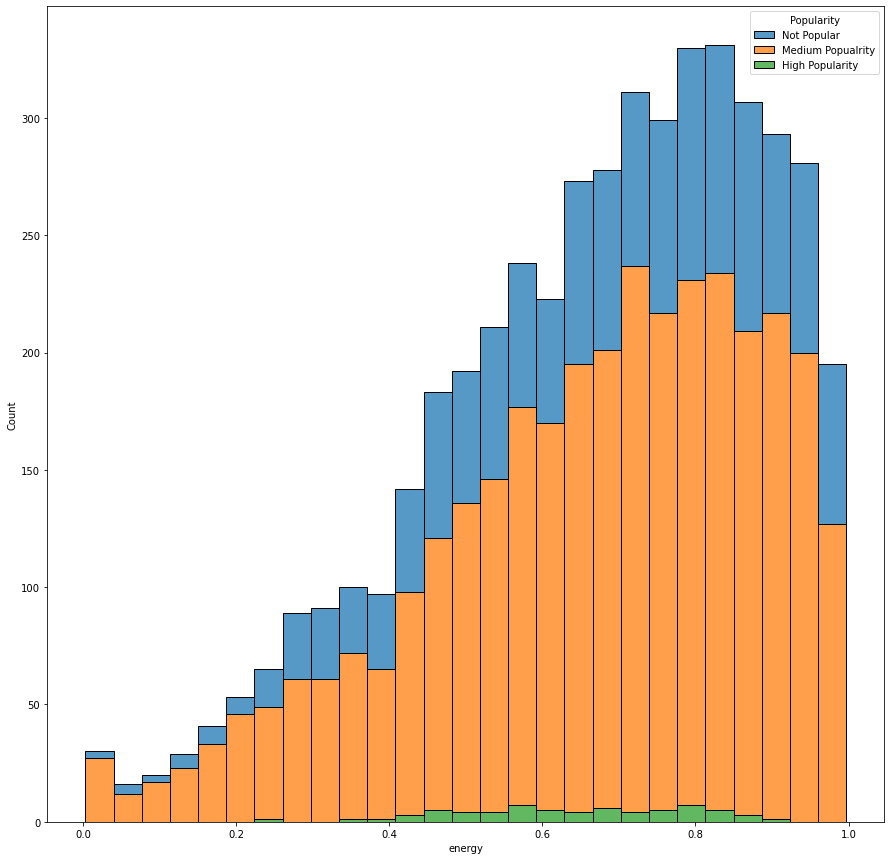

In [61]:
#taking a look at song energy vs. popularity
sns.histplot(x='energy', data=song_main, hue= 'Popularity', multiple ='stack');

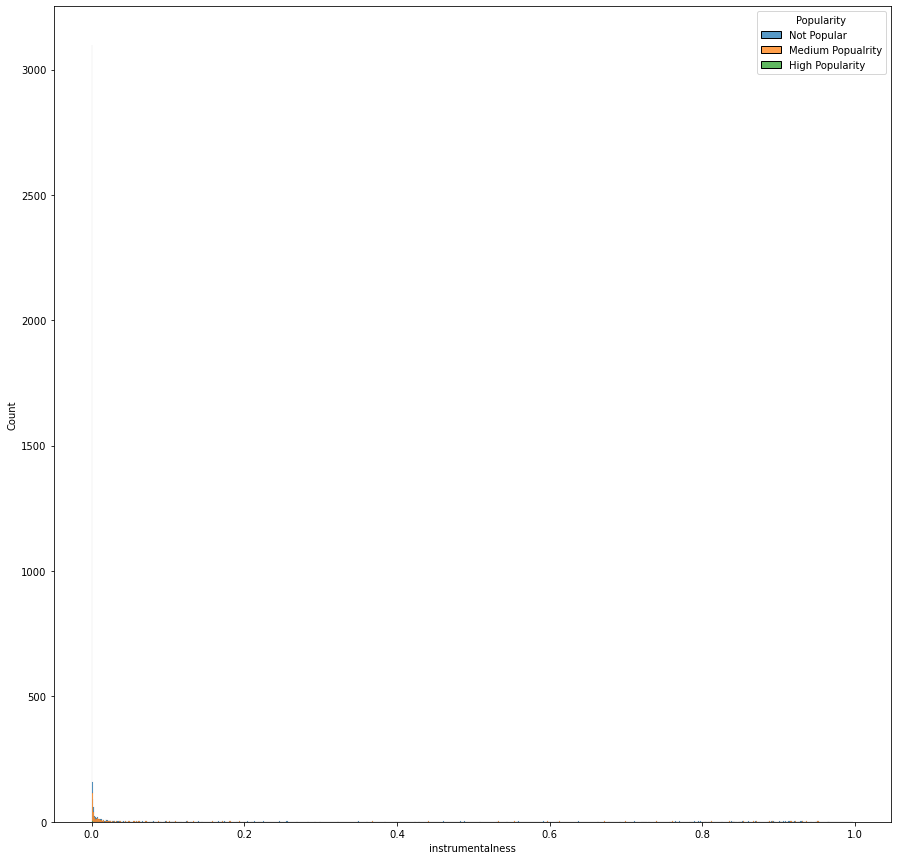

In [62]:
#taking a look at song instrumentalness vs. popularity
sns.histplot(x='instrumentalness', data=song_main, hue= 'Popularity', multiple ='stack');

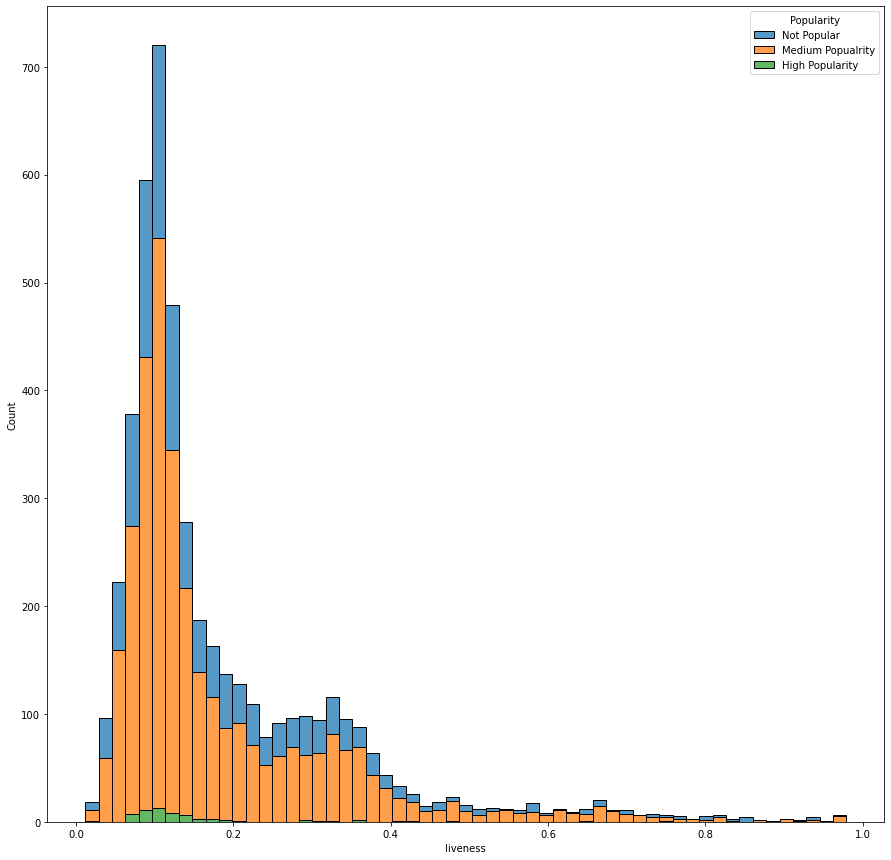

In [63]:
#taking a look at song liveness vs. popularity
sns.histplot(x='liveness', data=song_main, hue= 'Popularity', multiple ='stack');

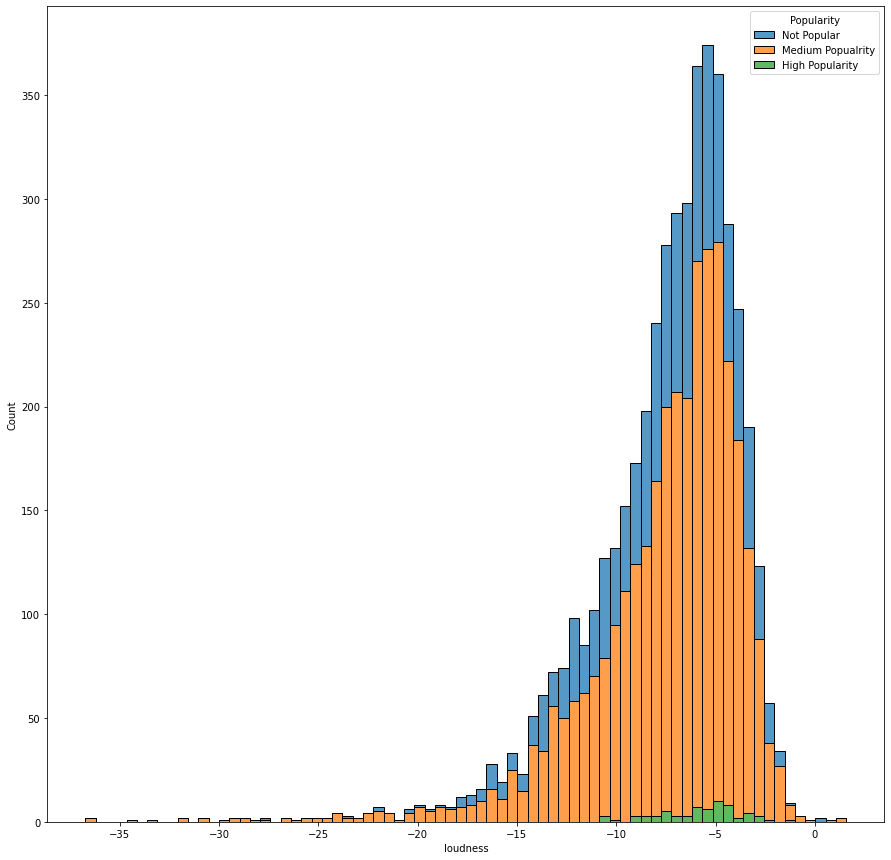

In [64]:
#taking a look at song loudness vs popularity.
sns.histplot(x='loudness', data=song_main, hue= 'Popularity', multiple ='stack');

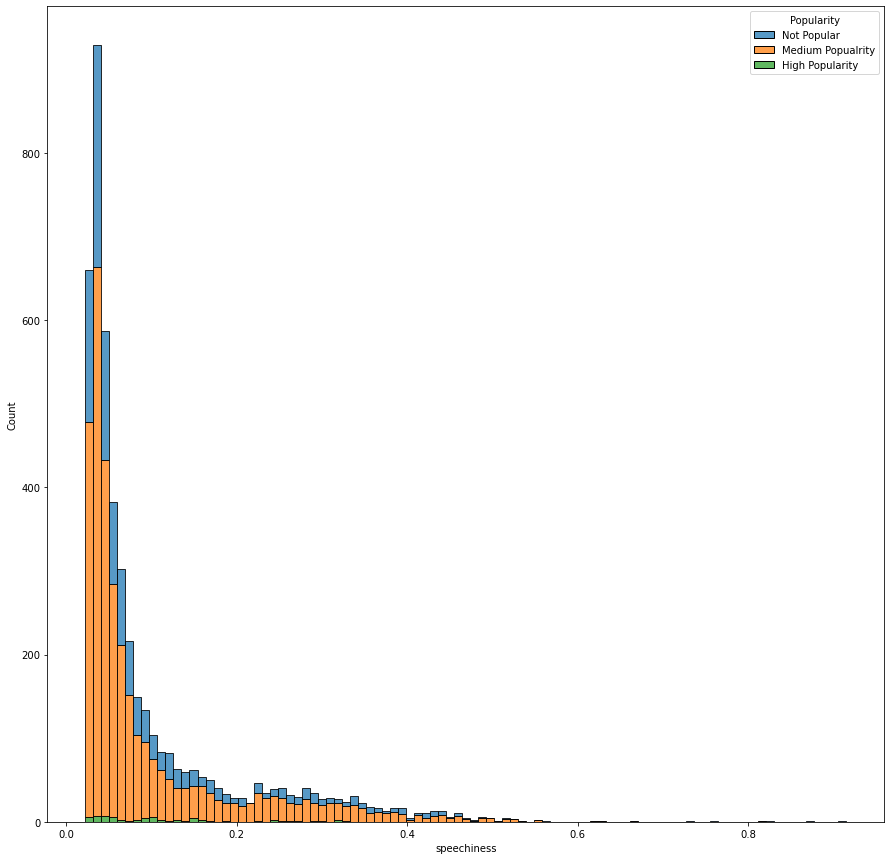

In [65]:
#taking a look at song speechiness vs. popularity
sns.histplot(x='speechiness', data=song_main, hue= 'Popularity', multiple ='stack');

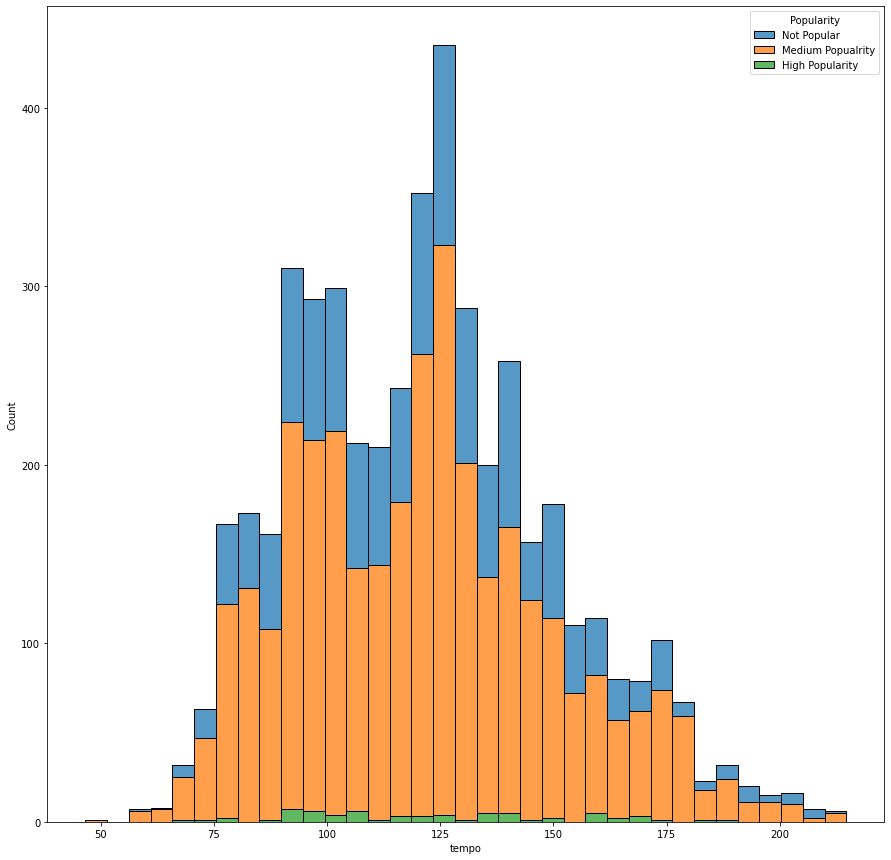

In [66]:
#taking a look at song tempo vs. popularity
sns.histplot(x='tempo', data=song_main, hue= 'Popularity', multiple ='stack');

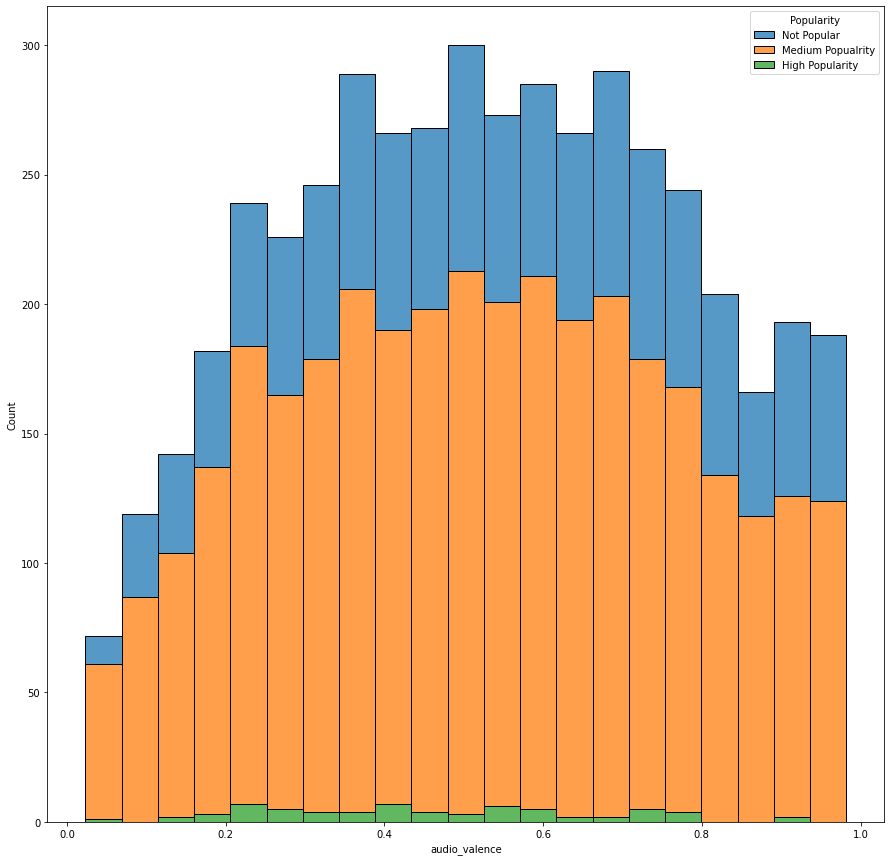

In [67]:
#taking a look at song audio_valence vs. popularity
sns.histplot(x='audio_valence', data=song_main, hue= 'Popularity', multiple ='stack');

In [69]:
# Observations on attributes with song_popularity
##low acousticness, high danceability, high energy, low instrunment, nto a live recording(liveness), high loudness, low speech, medium tempo
##the audio valence measuring the positivity mood of the song doesn't seem to have a definitive conclusion, there's popularity songs across the range
